In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt


Load data

In [2]:
df=pd.read_csv('../data/sierraleone-bumbuna.csv')

Summary Statistics and Missing Report

In [3]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [4]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [5]:
df.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525599,2022-10-30 00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


Description of columns

In [6]:
print('\n-----------\nThe description of categorical columns')
print(df.describe(include=[object]))
print('\n-----------\nThe description of all columns')
print(df.describe(include='all'))


-----------
The description of categorical columns
               Timestamp
count             525600
unique            525600
top     2021-10-30 00:01
freq                   1

-----------
The description of all columns
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2021-10-30 00:01            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     201.957515     116.376337     113.720571   
std                  NaN     298.495150     218.652659     158.946032   
min                  NaN     -19.500000      -7.800000     -17.900000   
25%                  NaN      -2.800000      -0.300000      -3.800000   
50%                  NaN       0.300000      -0.100000      -0.100000   
75%                  NaN     362.400000     107.0

Overview of dataset

In [7]:
print('\n-----------\nAn Overview of dataset')
print(df.info())


-----------
An Overview of dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float6

Identifying columns with more than 5% missing values

In [8]:
missing_values = df.isna().sum()
threshold = len(df) * 0.05
columns_with_missing = missing_values[missing_values > threshold]
print('Missing values count\n',missing_values)
print('\n-----------\nColumns with more than 5% missing values')
print(columns_with_missing)

Missing values count
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

-----------
Columns with more than 5% missing values
Comments    525600
dtype: int64


Outlier Detection & Basic Cleaning

In [9]:
# Compute Z-scores for key columns in a DataFrame (so we retain the same index)
numeric_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
z_df = pd.DataFrame(
    zscore(df[numeric_cols], nan_policy='omit'),
    index=df.index,
    columns=numeric_cols
)

# 2. Build an “outlier mask” per column and a combined row mask
outlier_mask_per_col = (z_df.abs() > 3)
any_outlier_row = outlier_mask_per_col.any(axis=1)
df[any_outlier_row]
print(f"Number of outlier samples flagged {any_outlier_row.sum()}")
print(df[any_outlier_row].head())

Number of outlier samples flagged 16292
            Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
653  2021-10-30 10:54  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   
654  2021-10-30 10:55  826.0  263.5  599.6  883.0  861.0  26.0  85.4  1.7   
655  2021-10-30 10:56  851.0  285.0  605.9  912.0  890.0  26.0  84.2  1.6   
656  2021-10-30 10:57  823.0  254.8  603.9  878.0  856.0  26.0  85.3  0.8   
657  2021-10-30 10:58  810.0  244.5  598.8  864.0  843.0  26.1  85.7  0.6   

     WSgust  WSstdev     WD  WDstdev    BP  Cleaning  Precipitation  TModA  \
653     1.1      0.5   81.4      7.9  1002         0            0.0   50.4   
654     2.4      0.4   74.6     12.1  1002         0            0.0   51.6   
655     2.1      0.5   66.4     14.6  1002         0            0.0   52.4   
656     1.6      0.6   90.2      7.0  1002         0            0.0   53.4   
657     1.6      0.6  108.5      7.9  1002         0            0.0   54.6   

     TModB  Comments  
653  

In [10]:
# Watching value counts for the columns
for col in numeric_cols:
    df_valueCount = pd.DataFrame({
    'count':df[col].value_counts().values
    }, index=df[col].value_counts().keys())
    df_valueCount.sort_index(inplace=True)
    display(df_valueCount.T)

GHI,-19.5,-18.9,-18.3,-17.2,-17.1,-17.0,-16.9,-16.8,-15.9,-15.8,...,1428.0,1433.0,1434.0,1445.0,1447.0,1453.0,1457.0,1463.0,1487.0,1499.0
count,1,2,1,3,3,1,2,1,1,3,...,1,1,1,1,1,1,1,1,1,1


DNI,-7.8,-7.5,-6.9,-6.8,-6.7,-6.0,-5.7,-5.6,-5.5,-5.4,...,937.0,938.0,939.0,940.0,941.0,942.0,943.0,944.0,945.0,946.0
count,1,1,1,1,1,3,2,2,1,1,...,1,5,5,9,5,3,6,2,3,1


DHI,-17.9,-17.7,-17.1,-16.9,-16.7,-16.6,-16.5,-16.4,-16.3,-16.2,...,791.9,802.0,807.0,810.0,817.0,819.0,827.0,837.0,846.0,892.0
count,1,1,1,1,4,6,6,12,8,11,...,1,1,2,1,1,1,1,1,1,1


ModA,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,1411.0,1413.0,1416.0,1424.0,1436.0,1437.0,1441.0,1443.0,1496.0,1507.0
count,246580,2810,1335,965,780,643,608,523,525,477,...,1,1,1,1,1,1,1,1,1,1


ModB,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,1380.0,1382.0,1384.0,1394.0,1405.0,1408.0,1409.0,1414.0,1464.0,1473.0
count,246940,2682,1350,985,790,673,609,550,544,476,...,1,1,2,1,1,1,1,1,1,1


WS,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,14.0,14.1,14.4,15.2,15.6,15.7,15.8,16.1,16.8,19.2
count,175505,16418,10870,11112,9343,10193,9432,10217,10087,10658,...,2,2,1,2,1,1,1,1,1,1


WSgust,0.0,0.4,0.6,0.7,1.0,1.1,1.2,1.4,1.5,1.6,...,19.1,19.6,19.9,20.1,20.9,21.6,22.7,22.9,23.4,23.9
count,166386,5644,1,24092,56,35358,1,27582,1,30371,...,3,1,2,2,1,1,1,1,1,1


Removing outlier rows

In [11]:
# Compute the medians on the *inlier* data only
medians = {}
for col in numeric_cols:
    medians[col] = df.loc[~any_outlier_row, col].median()

# Impute each outlier cell with its column’s inlier median
for col in numeric_cols:
    df.loc[any_outlier_row, col] = medians[col]

# Verify that no |Z|>3 remain
z_df2 = pd.DataFrame(
    zscore(df[numeric_cols], nan_policy='omit'),
    index=df.index,
    columns=numeric_cols
)
remaining = (z_df2.abs() > 3).any(axis=1).sum()
print(f"Remaining rows with |Z|>3: {remaining}")

Remaining rows with |Z|>3: 14808


In [12]:
# Watching value counts for the numeric columns after outlier remval
for col in numeric_cols:
    df_valueCount = pd.DataFrame({
    'count':df[col].value_counts().values
    }, index=df[col].value_counts().keys())
    df_valueCount.sort_index(inplace=True)
    display(df_valueCount.T)

GHI,-15.9,-15.8,-15.7,-15.6,-15.5,-15.4,-15.3,-15.2,-15.1,-15.0,...,1088.0,1089.0,1090.0,1091.0,1092.0,1093.0,1094.0,1095.0,1096.0,1097.0
count,1,2,4,14,18,21,28,32,35,45,...,15,16,16,17,17,9,14,13,11,15


DNI,-7.8,-6.0,-5.3,-5.0,-4.9,-4.8,-4.6,-4.4,-4.3,-4.2,...,771.4,771.5,771.6,771.7,771.8,771.9,772.0,772.1,772.2,772.3
count,1,1,2,1,1,1,2,3,3,2,...,5,7,11,6,8,6,12,5,5,7


DHI,-16.7,-16.6,-16.5,-16.4,-16.3,-16.2,-16.1,-16.0,-15.9,-15.8,...,589.6,589.7,589.8,589.9,590.0,590.1,590.2,590.3,590.4,590.5
count,4,6,6,12,8,9,18,10,24,25,...,7,5,8,6,4,10,5,9,7,2


ModA,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,1090.0,1091.0,1092.0,1093.0,1094.0,1095.0,1100.0,1100.5,1102.0,1105.0
count,245011,2784,1314,951,768,637,602,518,519,469,...,4,1,1,1,2,3,1,1,1,1


ModB,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,1055.0,1056.0,1057.0,1058.0,1059.0,1060.0,1061.0,1062.0,1063.0,1064.0
count,245370,2656,1328,971,778,669,600,547,533,473,...,11,9,5,5,6,4,6,13,3,14


WS,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8
count,174955,16160,10668,10886,9119,9954,9216,9983,26126,10392,...,1607,1643,1349,1137,1012,838,682,595,409,390


WSgust,0.0,0.4,0.6,0.7,1.0,1.1,1.2,1.4,1.5,1.6,...,4.1,4.4,4.6,4.9,5.2,5.4,5.7,5.9,6.2,6.4
count,165976,5570,1,23849,55,34887,1,43406,1,29651,...,10388,7145,5910,4919,3345,2564,2063,1309,848,522


In [13]:
# Parse timestamps
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M')

In [14]:
# Drop empty column comments
df.drop(columns=['Comments'], inplace=True)

Exporting cleaned data

In [15]:
df.to_csv('../data/sierraleone_cleaned_csv.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

Time-Series Visualizations

In [16]:
df['Timestamp']

0        2021-10-30 00:01:00
1        2021-10-30 00:02:00
2        2021-10-30 00:03:00
3        2021-10-30 00:04:00
4        2021-10-30 00:05:00
                 ...        
525595   2022-10-29 23:56:00
525596   2022-10-29 23:57:00
525597   2022-10-29 23:58:00
525598   2022-10-29 23:59:00
525599   2022-10-30 00:00:00
Name: Timestamp, Length: 525600, dtype: datetime64[ns]

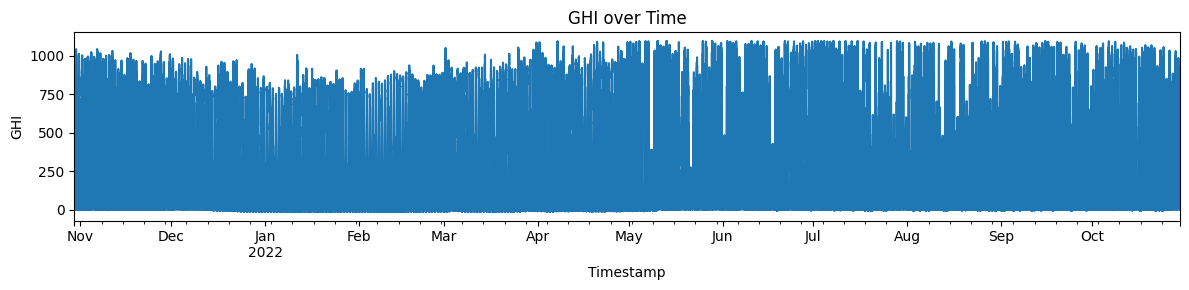

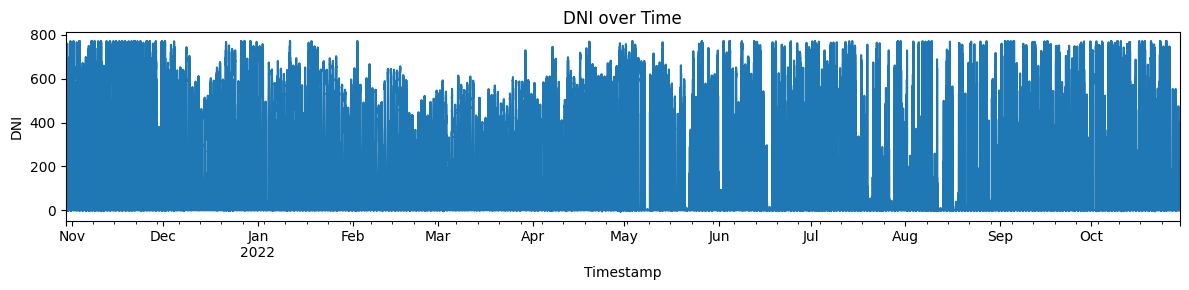

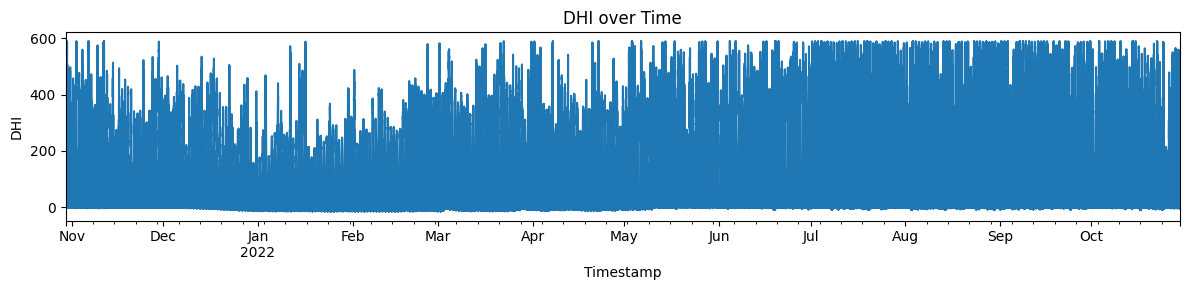

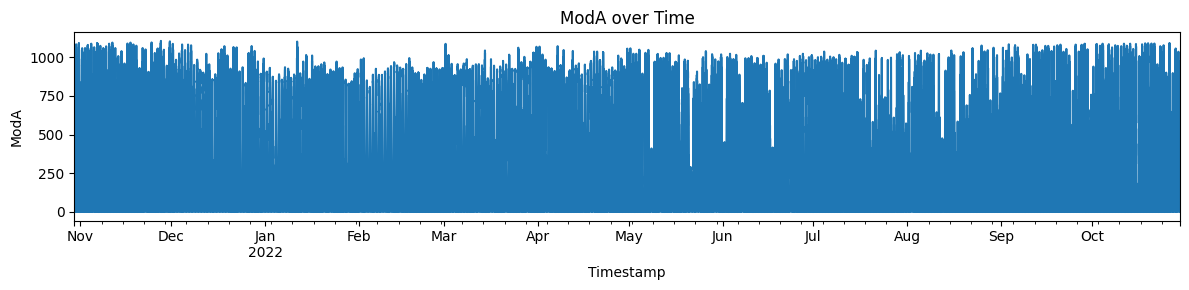

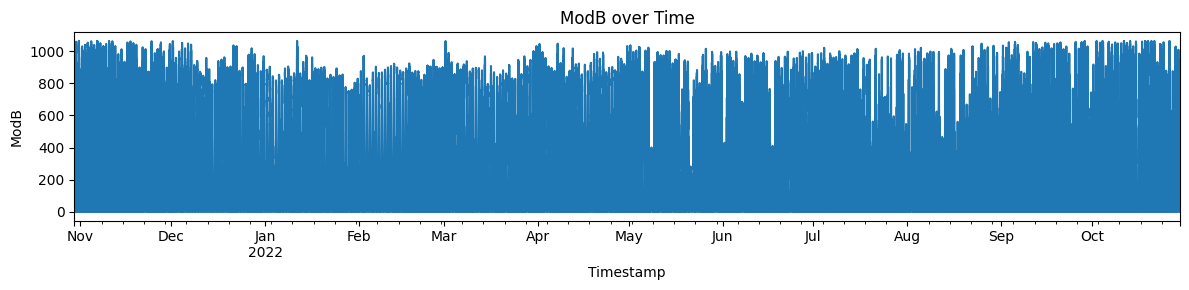

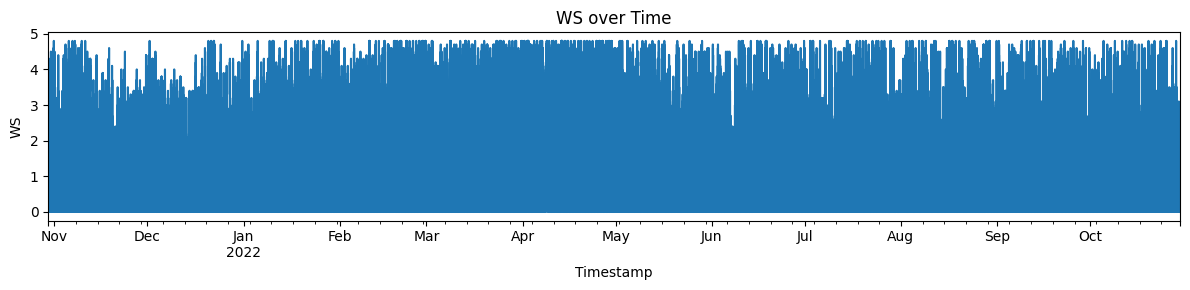

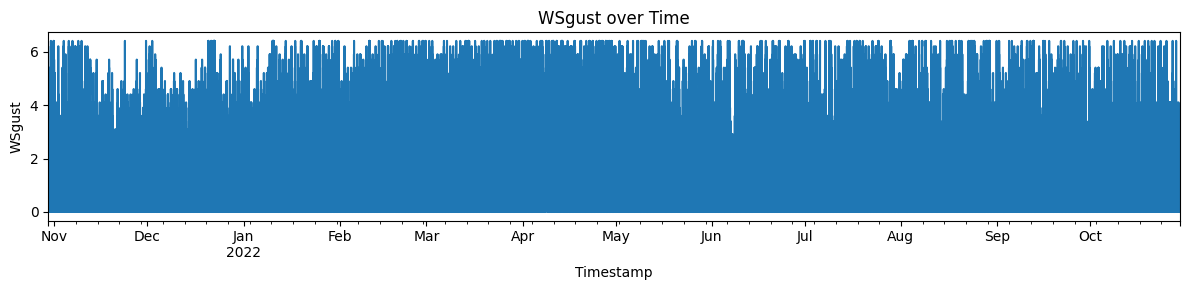

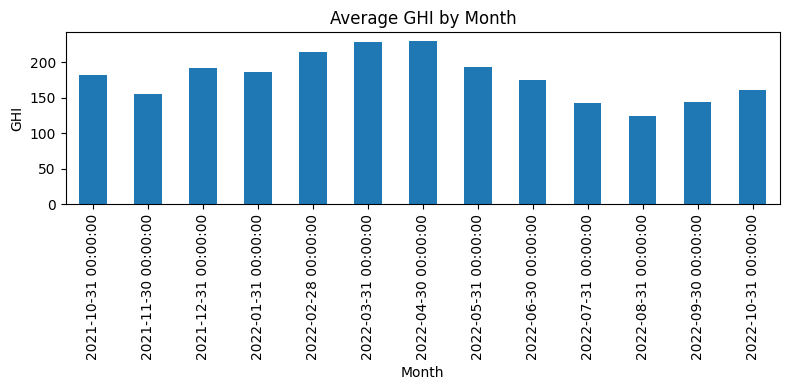

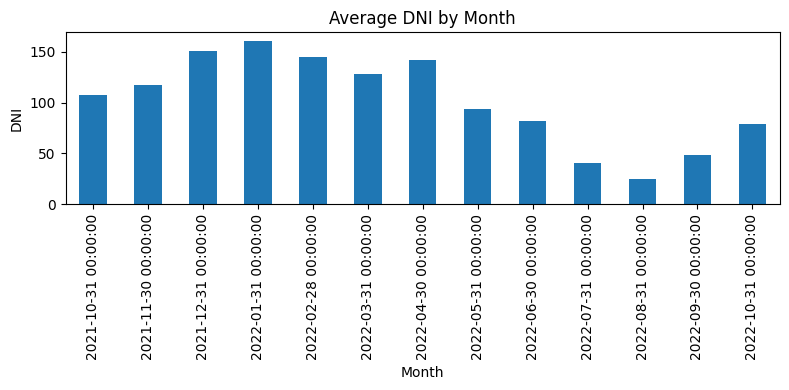

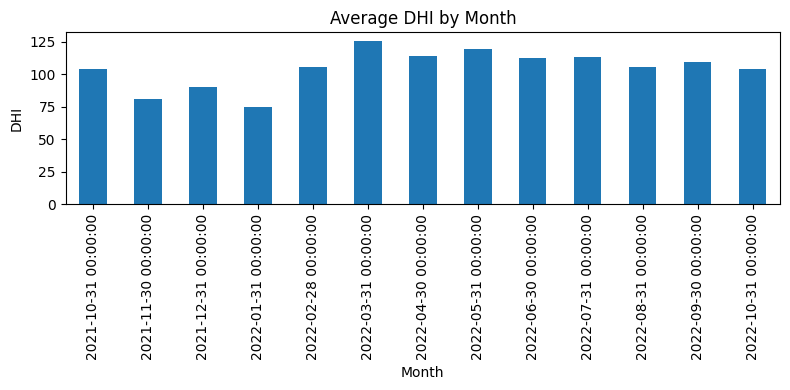

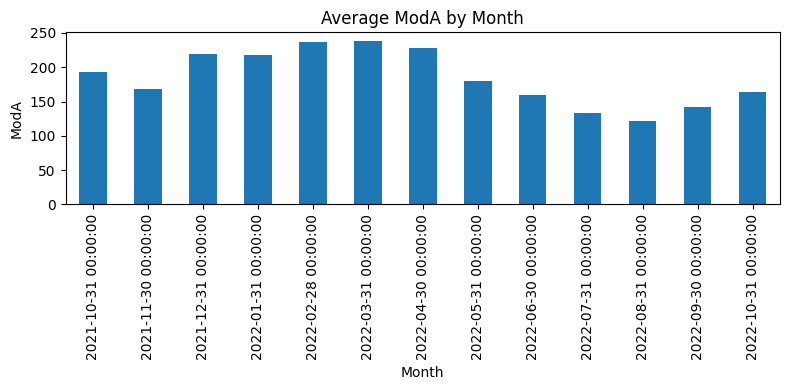

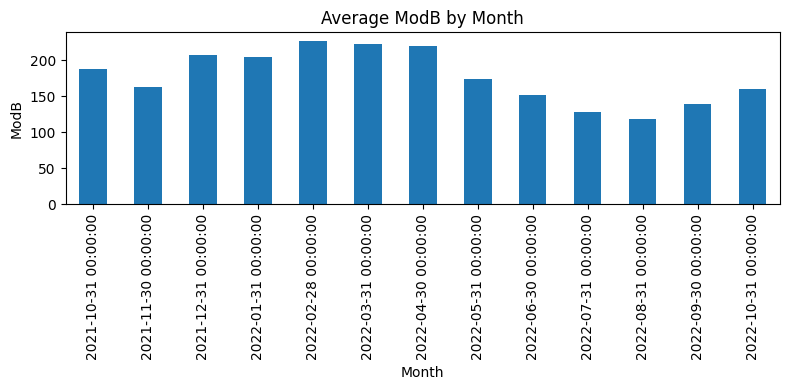

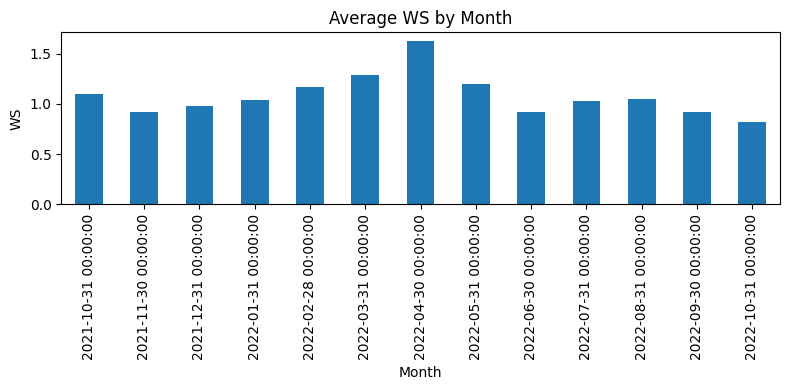

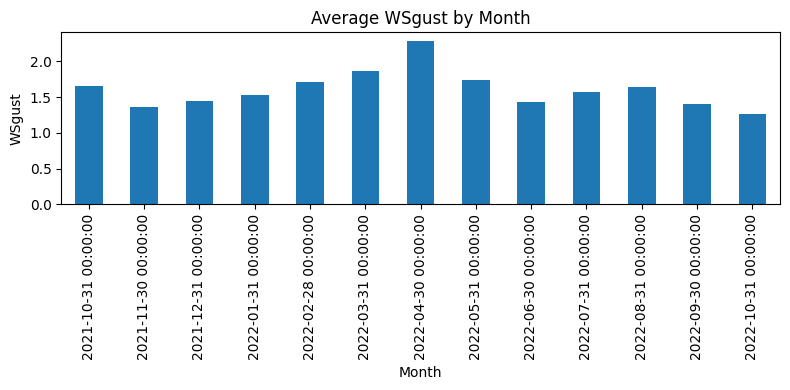

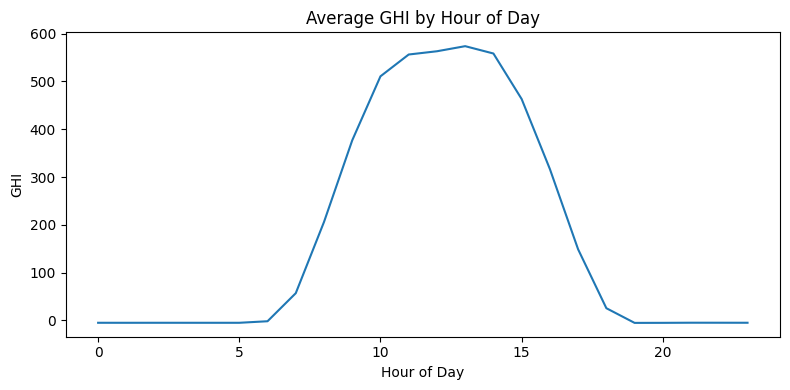

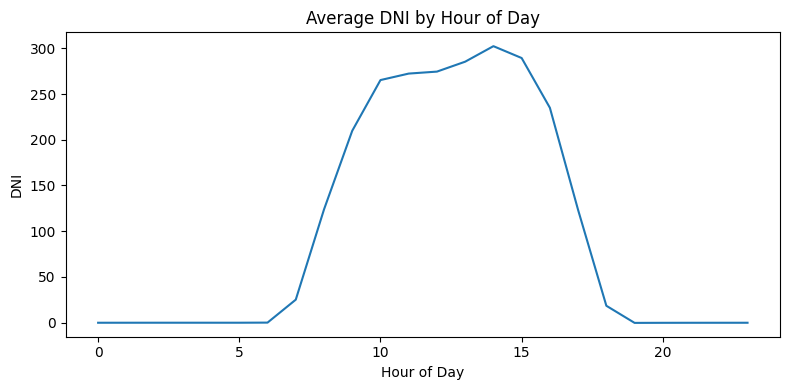

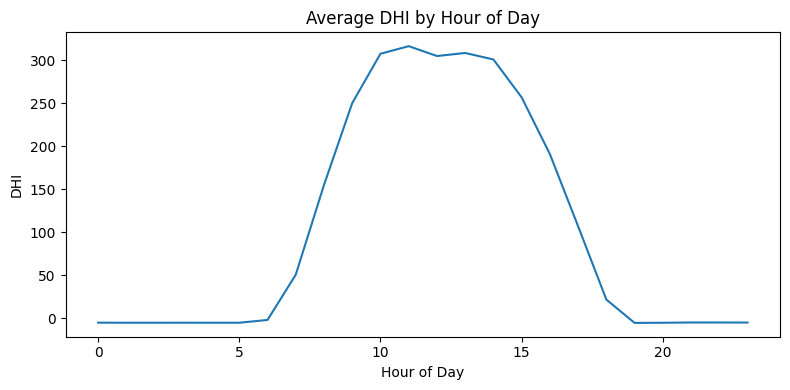

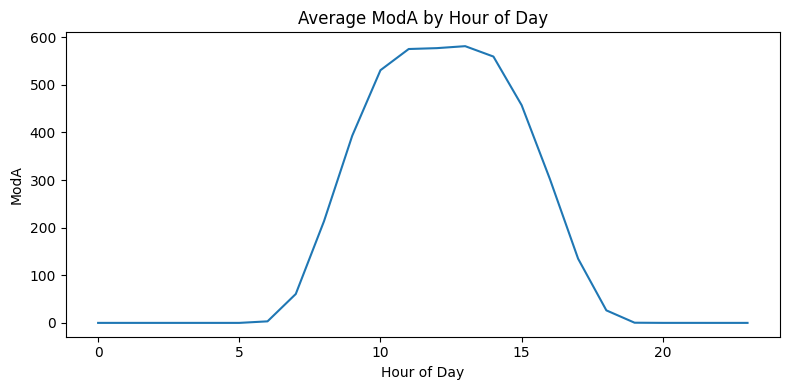

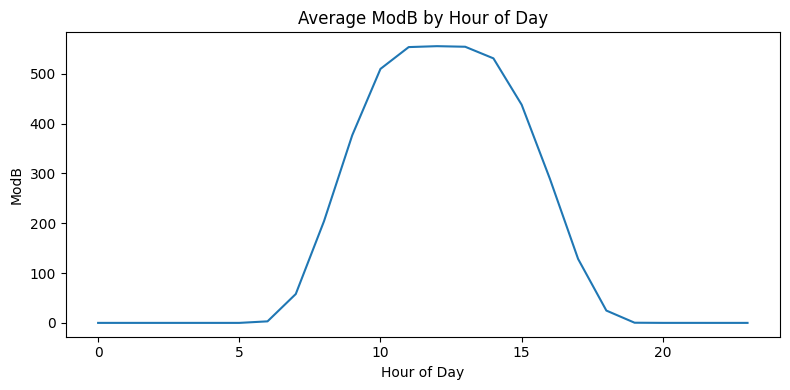

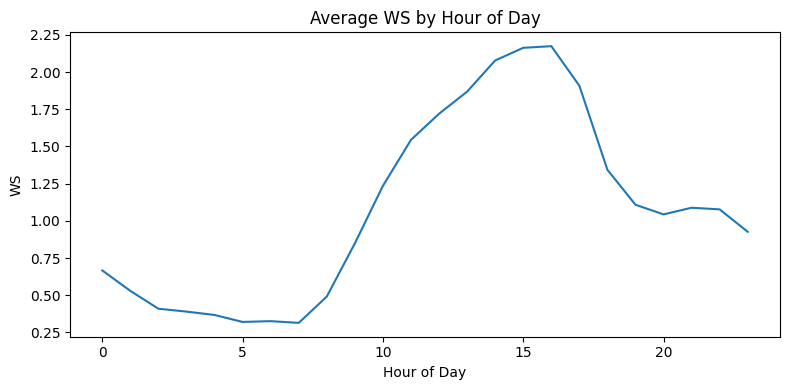

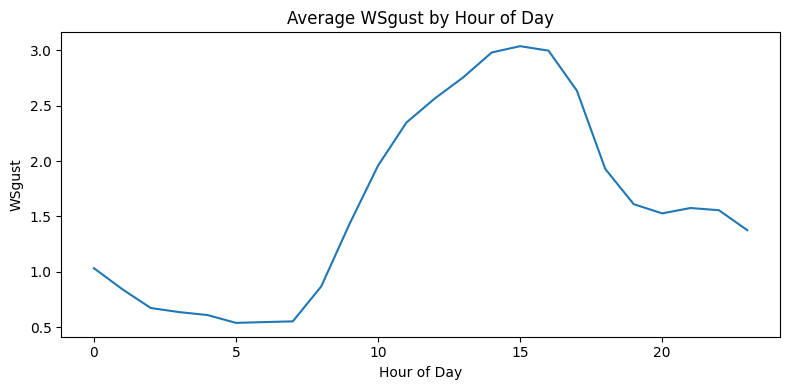

Top 5 Highest GHI readings:
Timestamp
2022-05-10 13:00:00    1097.0
2022-05-13 12:46:00    1097.0
2022-05-25 10:39:00    1097.0
2022-05-28 12:36:00    1097.0
2022-05-28 12:55:00    1097.0
Name: GHI, dtype: float64


In [17]:
df.set_index('Timestamp', inplace=True)
# ─── 1. Full Time-Series Line Charts ────────────────────────────────────────
for col in numeric_cols:
    plt.figure(figsize=(12,3))
    df[col].plot()
    plt.title(f"{col} over Time")
    plt.xlabel("Timestamp")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# ─── 2. Monthly Average Bar Charts ─────────────────────────────────────────
monthly = df[numeric_cols].resample('M').mean()
for col in monthly.columns:
    plt.figure(figsize=(8,4))
    monthly[col].plot(kind='bar')
    plt.title(f"Average {col} by Month")
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# ─── 3. Diurnal (Hourly) Patterns ───────────────────────────────────────────
hourly = df[numeric_cols].groupby(df.index.hour).mean()
for col in hourly.columns:
    plt.figure(figsize=(8,4))
    hourly[col].plot()
    plt.title(f"Average {col} by Hour of Day")
    plt.xlabel("Hour of Day")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# ─── 4. Inspect Top GHI Peaks ───────────────────────────────────────────────
top_peaks = df['GHI'].nlargest(5)
print("Top 5 Highest GHI readings:")
print(top_peaks)

Cleaning Impact

Raw data averages:
                ModA        ModB
Cleaning                        
0         206.578599  198.038150
1         273.309252  277.231102

Cleaned data averages:
                ModA        ModB
Cleaning                        
0         183.832797  175.998204
1         273.309252  277.231102


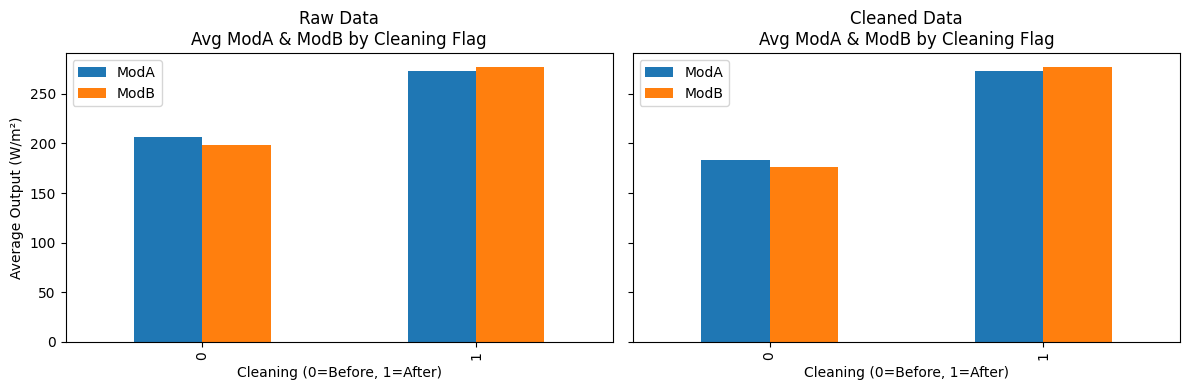

In [18]:
# ─── Load raw datasets ───────────────────────────────────────────
raw_path   = "../data/sierraleone-bumbuna.csv"    

df_raw   = pd.read_csv(raw_path,   parse_dates=["Timestamp"])

# ─── Group by the sensor cleaning flag ───────────────────────────────────────
grp_raw   = df_raw.groupby("Cleaning")[["ModA", "ModB"]].mean()
grp_clean = df.groupby("Cleaning")[["ModA", "ModB"]].mean()

print("Raw data averages:")
print(grp_raw)
print("\nCleaned data averages:")
print(grp_clean)

# ─── Plot side-by-side for comparison ────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

grp_raw.plot(kind="bar", ax=axes[0])
axes[0].set_title("Raw Data\nAvg ModA & ModB by Cleaning Flag")
axes[0].set_xlabel("Cleaning (0=Before, 1=After)")
axes[0].set_ylabel("Average Output (W/m²)")

grp_clean.plot(kind="bar", ax=axes[1])
axes[1].set_title("Cleaned Data\nAvg ModA & ModB by Cleaning Flag")
axes[1].set_xlabel("Cleaning (0=Before, 1=After)")

plt.tight_layout()
plt.show()


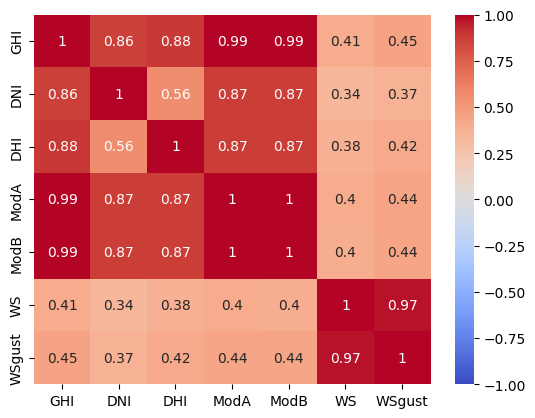

In [19]:
def draw():
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
    plt.show()
    return corr
corr = draw()

Wind & Distribution Analysis


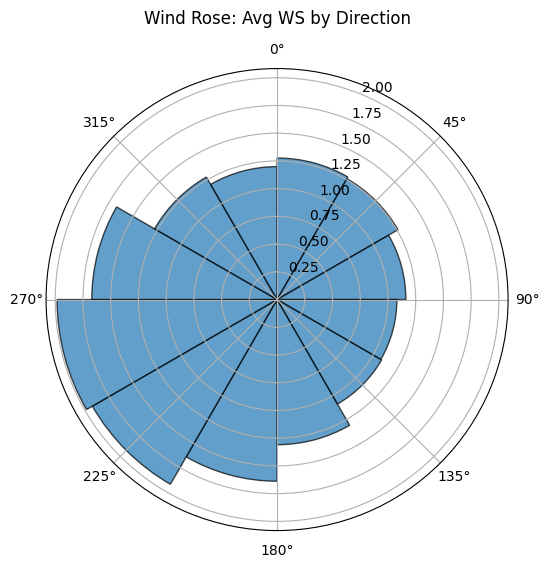

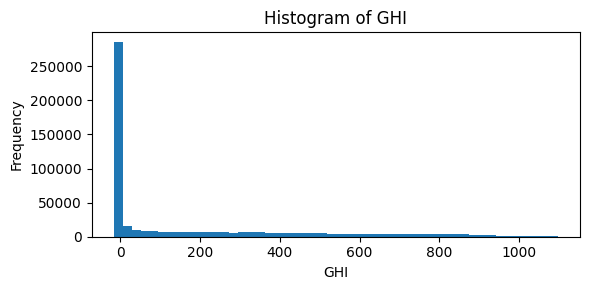

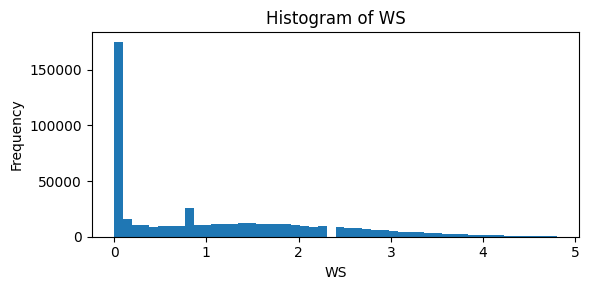

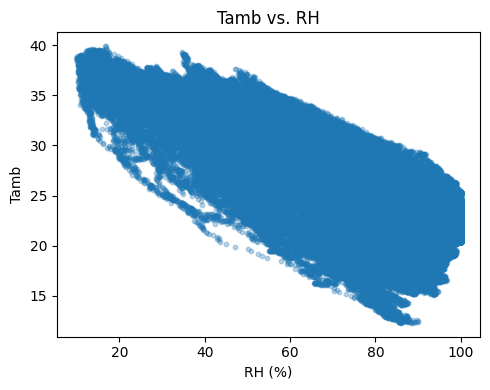

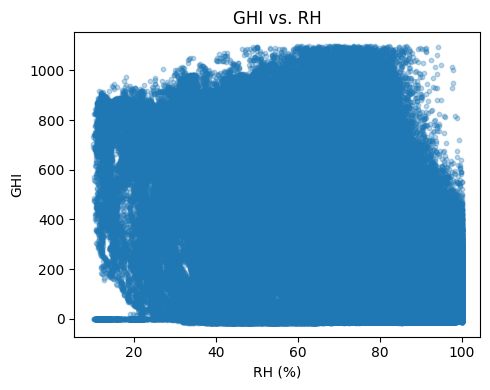

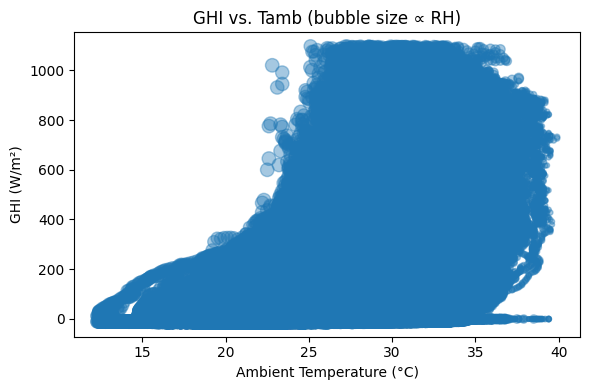

In [20]:
# 1. Wind Rose (radial bar of avg WS by WD)
dir_bins = np.linspace(0, 360, 13)  # 12 sectors of 30°
speed_by_dir = df.groupby(pd.cut(df['WD'], dir_bins))['WS'].mean()
# Compute mid-angles for each bin
angles = np.deg2rad((dir_bins[:-1] + dir_bins[1:]) / 2)

plt.figure(figsize=(6,6))
ax = plt.subplot(projection='polar')
ax.bar(angles, speed_by_dir, width=np.deg2rad(30), edgecolor='k', alpha=0.7)
ax.set_theta_zero_location('N')       # 0° at top (North)
ax.set_theta_direction(-1)            # Degrees increase clockwise
ax.set_title("Wind Rose: Avg WS by Direction", y=1.08)
plt.show()

# 2. Histograms for GHI and WS
for col in ['GHI', 'WS']:
    plt.figure(figsize=(6,3))
    plt.hist(df[col].dropna(), bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# 3. Temperature Analysis: RH’s influence
for x, y in [('RH', 'Tamb'), ('RH', 'GHI')]:
    plt.figure(figsize=(5,4))
    plt.scatter(df[x], df[y], s=10, alpha=0.3)
    plt.xlabel(f"{x} (%)")
    plt.ylabel(f"{y}")
    plt.title(f"{y} vs. {x}")
    plt.tight_layout()
    plt.show()

# 4. Bubble Chart: GHI vs. Tamb, bubble size ∝ RH
plt.figure(figsize=(6,4))
# normalize RH for marker size scaling (optional)
sizes = (df['RH'] / df['RH'].max()) * 100  
plt.scatter(df['Tamb'], df['GHI'], s=sizes, alpha=0.4)
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs. Tamb (bubble size ∝ RH)")
plt.tight_layout()
plt.show()
